# IC50 exploration

This notebook demonstrates how to process plates associated to the paper [A SARS-CoV-2 cytopathicity dataset generated by high-content screening of a large drug repurposing collection](https://doi.org/10.1038/s41597-021-00848-4).
We explore the metadata linked to [idr0094-ellinger-sarscov2/screenB](http://idr.openmicroscopy.org/webclient/?show=screen-2603).

In [2]:
# Load the libraries
library(romero.gateway)
library(dplyr)

## Connect to IDR

In [3]:
server <- OMEROServer(host = 'wss://idr.openmicroscopy.org/omero-ws', port = 443L, username='public', password='public')
server <- connect(server)
paste('Successfully logged in as', server@user$getUserName())

[1] "Successfully logged in as public"

## Load the metadata associated to the study

In [4]:
screenId <- 2603
tableName <- 'bulk_annotations'

### Load the annotations as R-Dataframes
Due to the size of the table, this could take few minutes.

In [15]:
screen <- loadObject(server, "ScreenData", screenId)

annos <- getAnnotations(server, 'ScreenData', getOMEROID(screen), nameFilter = tableName)
annotationFileID = as.integer(annos$FileID)

df <- loadDataframe(screen, annotationFileID)
df

Plate,Well,Characteristics [Organism 1],Term Source 1 REF,Term Source 1 Accession,Characteristics [Organism 2],Term Source 2 REF,Term Source 2 Accession,Characteristics [Cell Line],Term Source 3 REF,⋯,Control Type,Quality Control,Channels,Compound Concentration (microMolar),Percentage Inhibition (DPC),Cells - Number of Objects,Hit Compound (over 75% activity),Phenotype Annotation Level,Plate Name,Well Name
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560940),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,54.9,19819,Yes,well level,ESP0025712,a1
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560905),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,70.28,23010,Yes,well level,ESP0025712,a2
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560897),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,73.25,23627,Yes,well level,ESP0025712,a3
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560924),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,0.56,8544,Yes,well level,ESP0025712,a4
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560856),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,-3.4,7723,Yes,well level,ESP0025712,a5
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560847),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,38.08,16329,Yes,well level,ESP0025712,a6
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560899),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,12.96,11116,Yes,well level,ESP0025712,a7
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560862),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,42.41,17228,Yes,well level,ESP0025712,a8
omero.gateway.model.PlateData (id=7815),omero.gateway.model.WellSampleData (id=1560927),Homo sapiens,NCBITaxon,NCBITaxon_9606,Severe acute respiratory syndrome coronavirus 2,NCBITaxon,NCBITaxon_2697049,Caco-2,EFO,⋯,,pass,cell body,20,61.74,21238,Yes,well level,ESP0025712,a9


## Rename the data frame column to simplify exploration 

In [16]:
names(df)[24] <- "ConcX"
names(df)[25] <- "RespY"
names(df)[13] <- "CN"
names(df)[19] <- "InChIKey"

## Filter by compound
First copy the data frame.

In [55]:
compoundName <- "Remdesivir"
inChIKey <- "RWWYLEGWBNMMLJ-YSOARWBDSA-N"

In [56]:
dfcopy <- cbind(df)
dfcopy <- filter(dfcopy, CN == compoundName)
nrow(dfcopy)

[1] 24

## Extract and format data

In [50]:
df1 <- subset(dfcopy, select=c("ConcX", "RespY"))
df1 <- df1[c("RespY", "ConcX")]
data <- mutate_all(df1, function(x) as.numeric(as.character(x)))

## Calculate the half maximal inhibitory concentration IC50

The half maximal inhibitory concentration (IC50) is a measure of the potency of a substance in inhibiting a specific biological or biochemical function. IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit, in vitro, a given biological process or biological component by 50%.

In [51]:
sortedConcX = sort(data$ConcX)
sortedRespY = sort(data$RespY)
lx <- (log10(sortedConcX))
xx <- lx * lx
xy <- lx * sortedRespY
sumx <- sum(lx)
sumy <- sum(sortedRespY)
sumxx <- sum(xx)
sumxy <- sum(xy)
sizexy <- length(xy) 
M <- (sumxy*sizexy - sumx*sumy)/(sumxx*sizexy-sumx*sumx)
N <- (sumy- M*sumx)/sizexy
lowerBound <- min(sortedRespY)
upperBound <- max(sortedRespY)

IC50 <- 10^(((lowerBound + upperBound)/2-N)/M)
Hill <- sign(M)
Fit <- lowerBound + ((upperBound - lowerBound )/(1+((IC50/sortedConcX)^Hill)))
res <- sortedRespY -Fit
IC50

[1] 0.489774

## Plot the Dose Response curve 

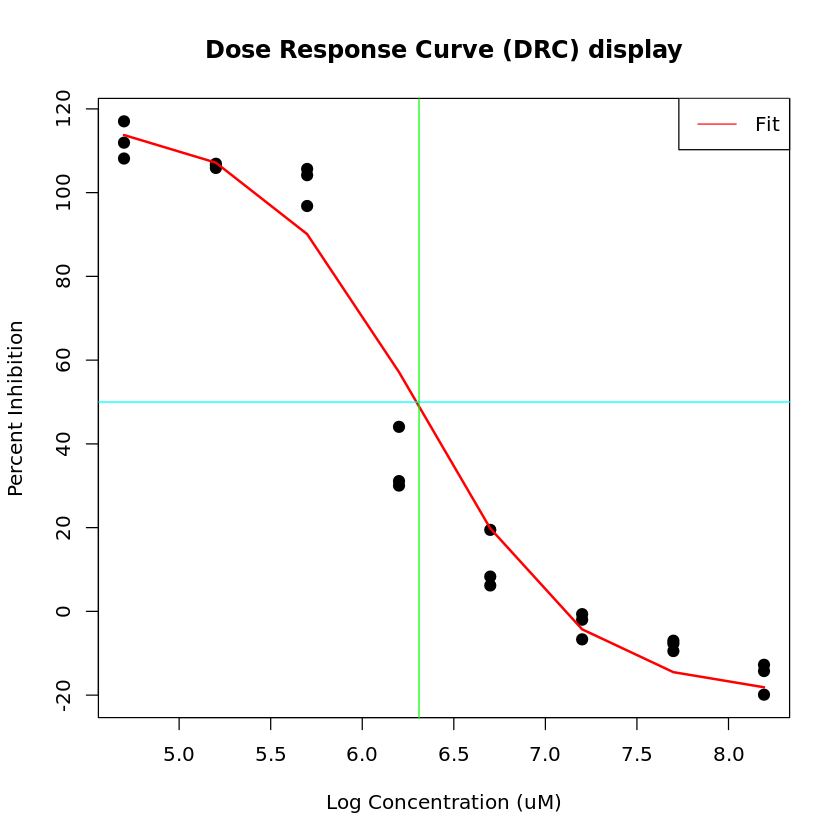

In [52]:
n = 6

plot(n - lx , sortedRespY,
     main = "Dose Response Curve (DRC) display",
     xlab = "Log Concentration (uM)",
     ylab = "Percent Inhibition", pch=20, lwd=5)
lines(n - lx, Fit, col="red", pch=5, lwd=2)
abline(v = 0, h = 50, col = "cyan")
abline(v = n - log10(IC50), col = "green")
legend("topright", legend=c("Fit"),
       col=c("red"), lty = 1:2, cex=1)

## Close the connection to the server 

In [ ]:
conn.close()

### License

Copyright (C) 2021 University of Dundee. All Rights Reserved. This program is free software; you can redistribute it and/or modify it under the terms of the GNU General Public License as published by the Free Software Foundation; either version 2 of the License, or (at your option) any later version. This program is distributed in the hope that it will be useful, but WITHOUT ANY WARRANTY; without even the implied warranty of MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU General Public License for more details. You should have received a copy of the GNU General Public License along with this program; if not, write to the Free Software Foundation, Inc., 51 Franklin Street, Fifth Floor, Boston, MA 02110-1301 USA. 